In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Nomor 7

In [3]:
con = sqlite3.connect('./chinook.db')
cur = con.cursor()
cur.execute('''SELECT genres.Name as Genre 
                FROM genres, tracks 
                WHERE genres.GenreId=tracks.GenreId;''')
data = cur.fetchall()
cur.description
df = pd.DataFrame(data, columns= [x[0] for x in cur.description])

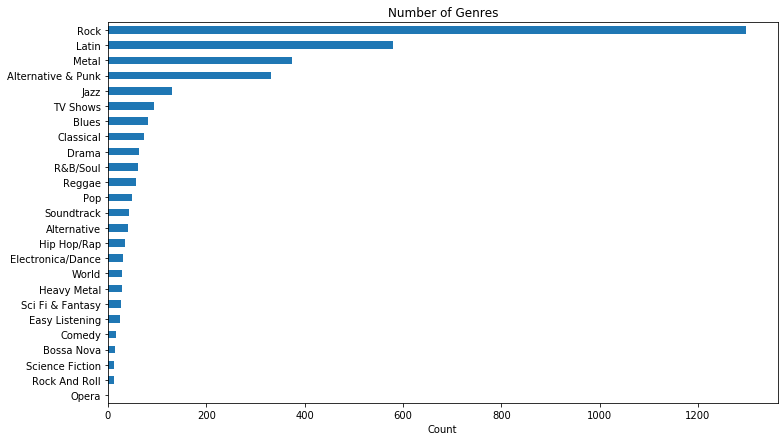

In [4]:
df['Genre'].value_counts().sort_values().plot.barh(figsize=(12,7))
plt.title('Number of Genres')
plt.xlabel('Count')
plt.show()

# Nomor 8

In [5]:
cur.execute('''SELECT
                    playlists.Name as Playlist,
                    genres.Name as Genre
                FROM playlist_track,
                    playlists, tracks,
                    genres
                WHERE 
                    playlist_track.PlaylistId=playlists.PlaylistId
                AND playlist_track.TrackId=tracks.TrackId
                AND tracks.GenreId=genres.GenreId;''')
data1 = cur.fetchall()
cur.description
df1 = pd.DataFrame(data1, columns= [x[0] for x in cur.description])

In [6]:
grouped = df1.groupby(['Playlist','Genre']).agg({'Genre':'count'})
grouped

Genre
Playlist                   Genre                    
90’s Music                 Alternative            10
                           Alternative & Punk    193
                           Blues                  32
                           Classical              40
                           Electronica/Dance      11
                           Hip Hop/Rap            35
                           Jazz                   25
                           Latin                 257
                           Metal                 164
                           Opera                   1
                           R&B/Soul               31
                           Reggae                 28
                           Rock                  621
                           Rock And Roll          12
                           Soundtrack             15
                           World                   2
Brazilian Music            Latin                  39
Classical                  Classical              73
                           Opera                   1
                           Soundtrack              1
Classical 101 - Deep Cuts  Classical              24
                           Soundtrack              1
Classical 101 - Next Steps Classical              24
                           Opera                   1
Classical 101 - The Basics Classical              25
Grunge                     Alternative             1
                           Rock                   14
Heavy Metal Classic        Heavy Metal             2
                           Metal                  15
                           Rock                    9
Music                      Alternative            80
                           Alternative & Punk    664
                           Blues                 162
                           Bossa Nova             30
                           Classical             148
                           Easy Listening         48
                           Electronica/Dance      60
                           Heavy Metal            56
                           Hip Hop/Rap            70
                           Jazz                  260
                           Latin                1158
                           Metal                 748
                           Opera                   2
                           Pop                    96
                           R&B/Soul              122
                           Reggae                116
                           Rock                 2594
                           Rock And Roll          24
                           Soundtrack             86
                           World                  56
Music Videos               Alternative             1
On-The-Go 1                Jazz                    1
TV Shows                   Comedy                 34
                           Drama                 128
                           Sci Fi & Fantasy       52
                           Science Fiction        26
                           TV Shows              186

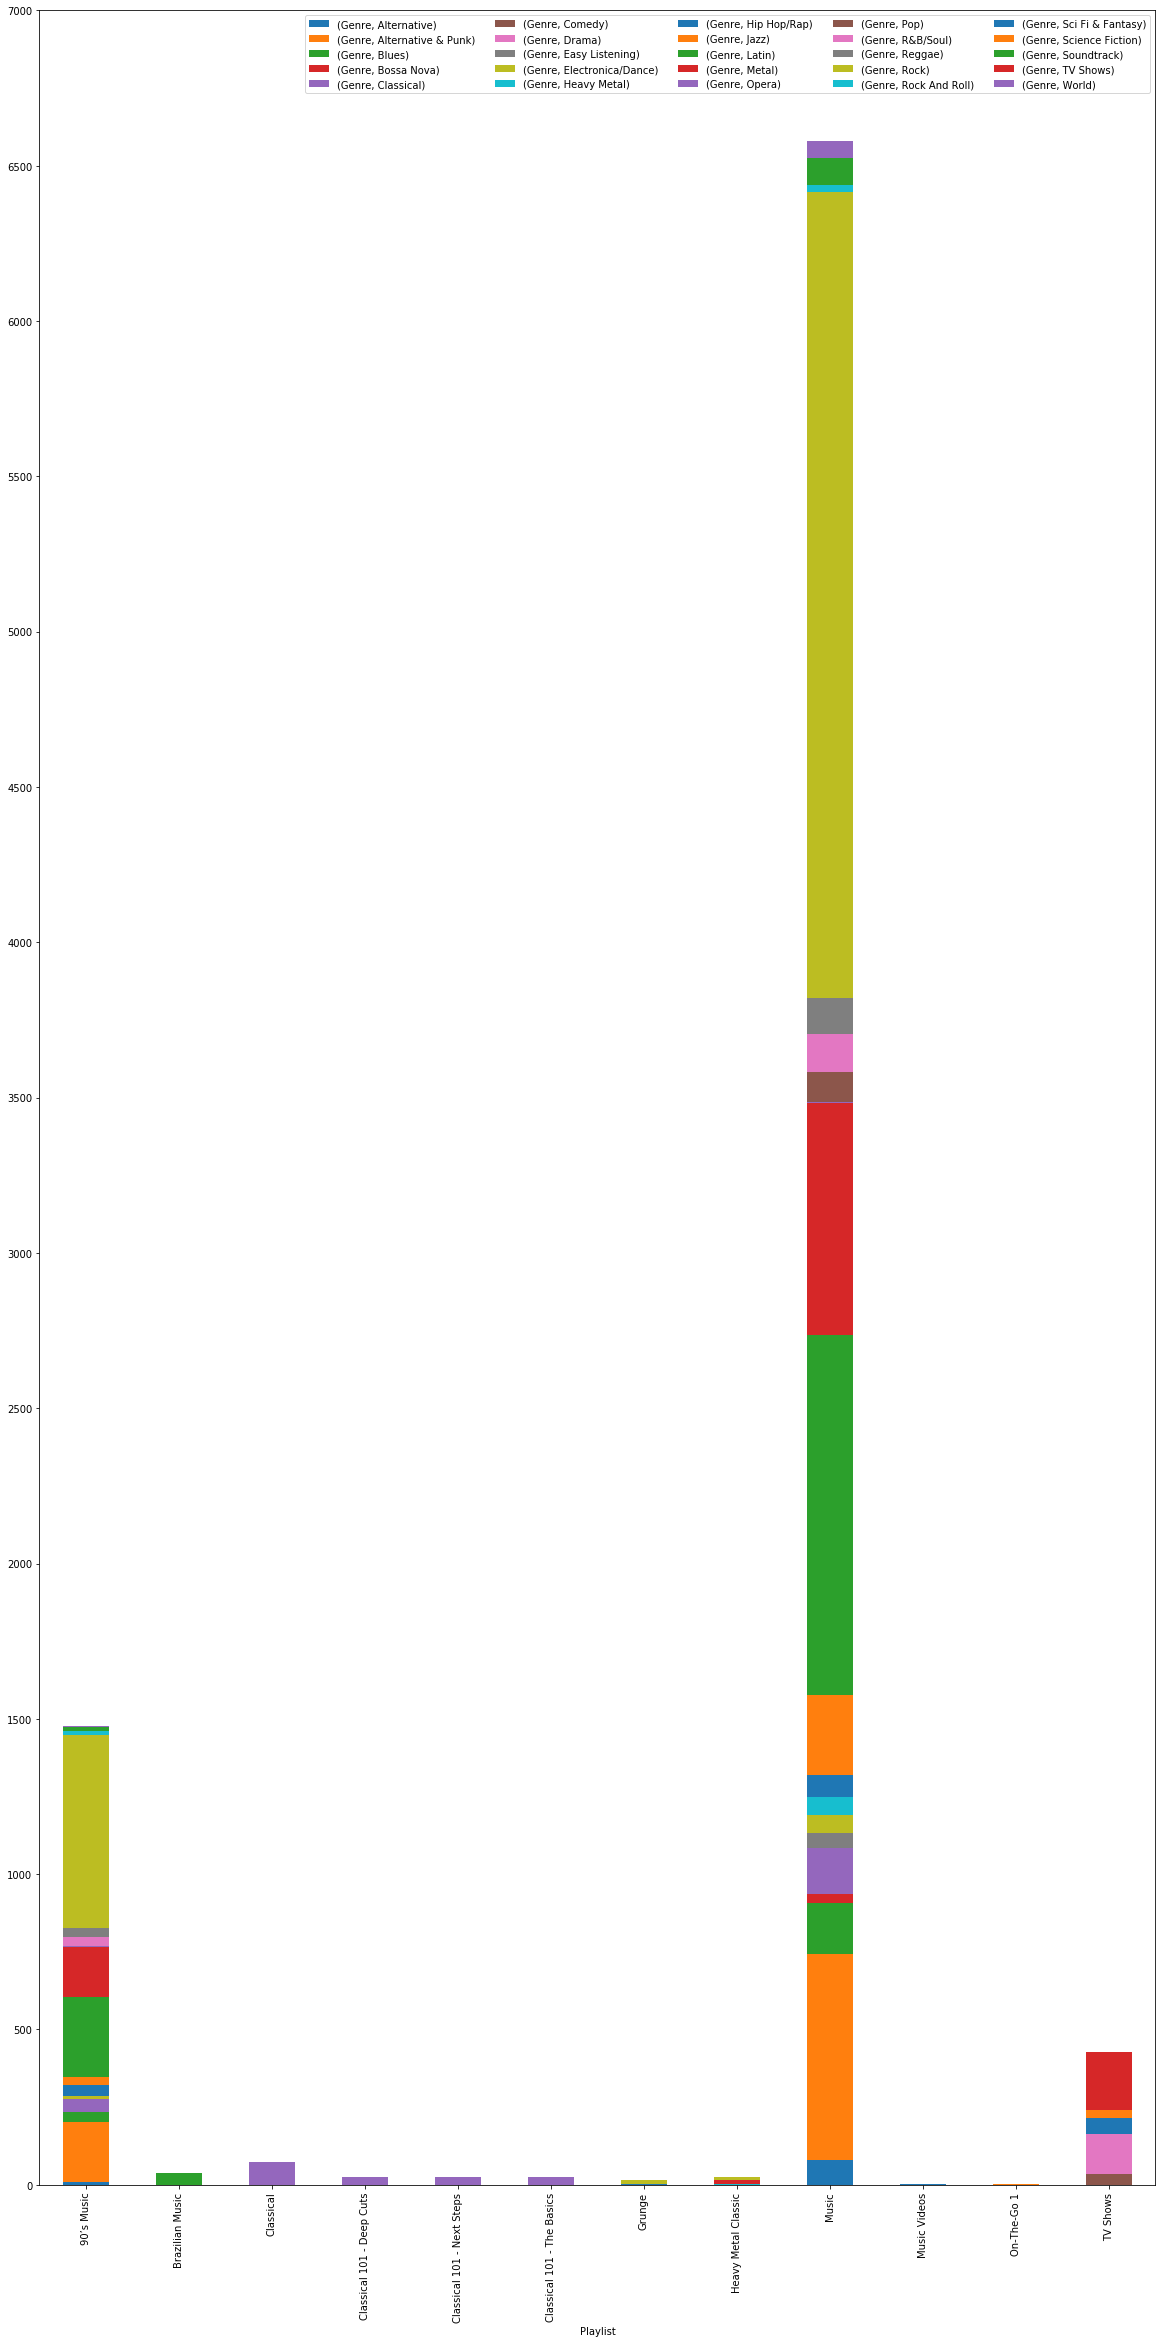

In [7]:
grouped.unstack().plot(kind='bar', stacked=True, figsize=(20,40))
plt.yticks(np.arange(0, 7500, step=500))
plt.legend(loc=0, ncol=5)
plt.show()

# Nomor 9

In [8]:
cur.execute('''SELECT invoices.BillingCountry,
                    genres.Name as Genre
                FROM invoices,
                    genres,
                    invoice_items,
                    tracks
                WHERE invoice_items.InvoiceId=invoices.InvoiceId AND
                    invoice_items.TrackId=tracks.TrackId AND
                    tracks.GenreId=genres.GenreId;''')
data2 = cur.fetchall()
cur.description
df2 = pd.DataFrame(data2, columns= [x[0] for x in cur.description])

In [9]:
df2.head()

,BillingCountry,Genre
0,Germany,Rock
1,Germany,Rock
2,Norway,Rock
3,Norway,Rock
4,Norway,Rock


In [10]:
grouped_country = df2.groupby(['BillingCountry', 'Genre']).agg({'Genre':'count'})

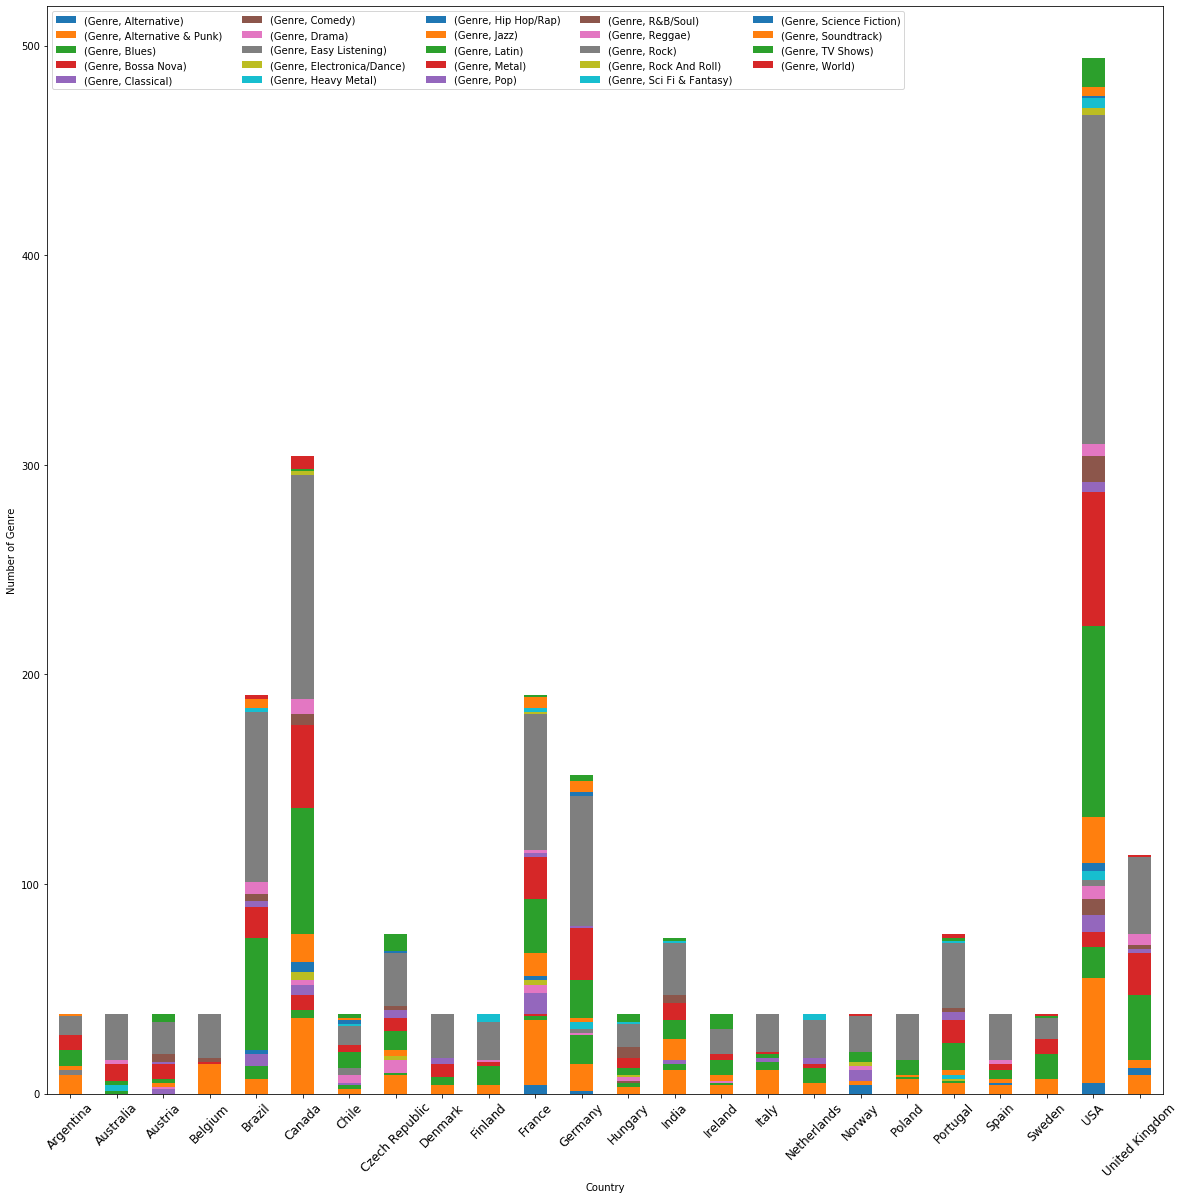

In [11]:
grouped_country.unstack().plot.bar(stacked=True, figsize=(20,20))
plt.legend(loc='best', ncol=5)
plt.xticks(rotation=45, size=12)
plt.xlabel('Country')
plt.ylabel('Number of Genre')
plt.show()